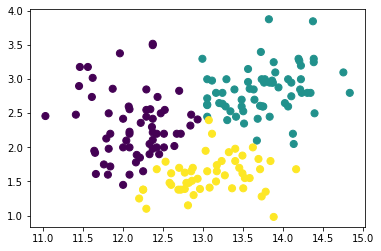

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Setting _stop=True causes iteration to stop when out of validate and  error occur.
class KMeans(object):  
    def __init__(self, n_clusters=8, max_iter=200, _stop=False, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.stop = _stop

    def fit(self, X):
        #Centroid initialization from picking k random initial centroid values 
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        #run the clustering algorithm multiple time
        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]

            # update the clusters. end up with the best clustering performance
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        # sum of square distances from the closest cluster
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self
    
    def _distance(self, a, b):
        # return np.sqrt(((a - b)**2).sum())
        return np.sqrt(np.sum((a - b)**2))

    #Reassign the center of newly formed clusters. 
    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    #Predict clusters for the sample in X
    def predict(self, X, sample_weight=None):
        return self.labels_

      
    
if __name__ == '__main__':
    df = pd.read_csv("./wine.csv")
    df = df[['Alcohol', 'Phenols']]
    X = df.values

     
    kmeans = KMeans(3)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centroid= kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
 
centers = kmeans.cluster_centers_;

##Compare above results with  the results yielded by the standard versions of the k_mean cluster from sklearn library. You can find they are same:

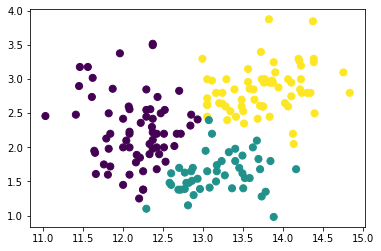

In [3]:
from sklearn.cluster import KMeans

df = pd.read_csv("./wine.csv")
df = df[['Alcohol', 'Phenols']]
X = df.values

     
kmeans = KMeans(3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centroid= kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_ ;
